ROOT histograms

Welcome to JupyROOT 6.30/04


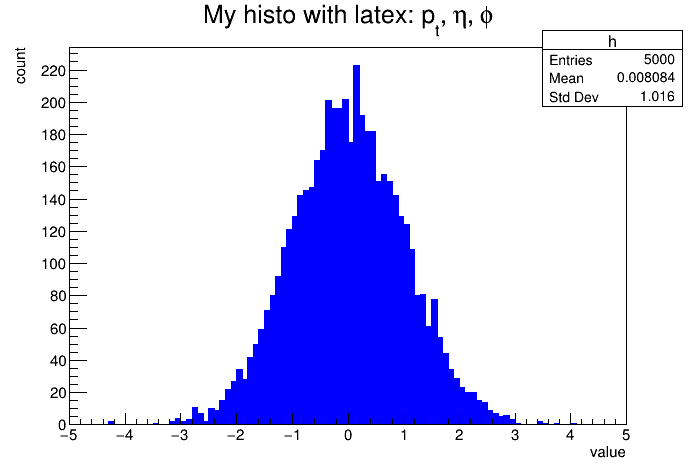

In [2]:
import ROOT
h = ROOT.TH1D(name = "h", title = "My histo", nbinsx = 100, xlow = -5, xup = 5)
h.FillRandom("gaus", ntimes = 5000)

c = ROOT.TCanvas()
h.SetLineColor(ROOT.kBlue)
h.SetFillColor(ROOT.kBlue)
h.GetXaxis().SetTitle("value")
h.GetYaxis().SetTitle("count")
h.SetTitle("My histo with latex: p_{t}, #eta, #phi")
h.Draw()
c.Draw()
# %jsroot off

ROOT functions

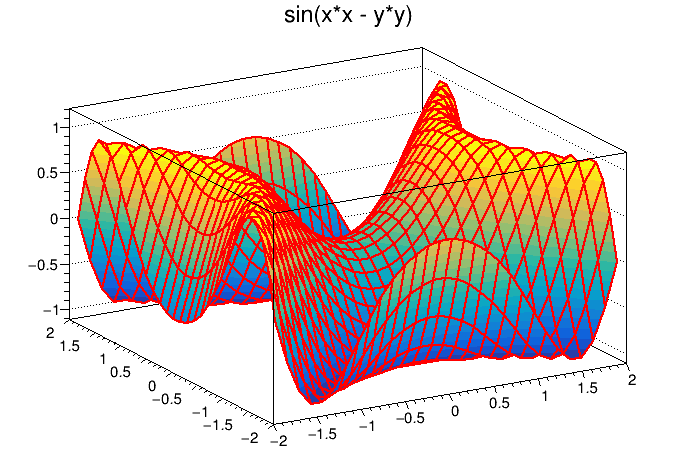

In [3]:
f2 = ROOT.TF2("f2", "sin(x*x - y*y)", xmin = -2, xmax = 2, ymin =-2, ymax = 2)
c = ROOT.TCanvas()
f2.Draw("surf1")
c.Draw()

Fitting a histogram

In [4]:
%%cpp
double gaussian(double *x, double *par) {
    return par[0]*TMath::Exp(-TMath::Power(x[0] - par[1], 2.) / 2.)
           / TMath::Sqrt(2 * TMath::Pi());
}

****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      57.2302
NDf                       =           67
Edm                       =  1.34911e-09
NCalls                    =           44
p0                        =      494.933   +/-   7.03982     
p1                        =    0.0173689   +/-   0.0142894   


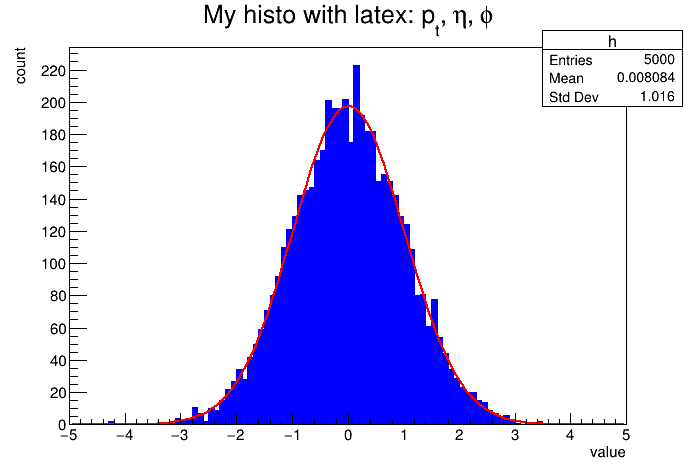

In [5]:
fitFunc = ROOT.TF1("fitFunc", ROOT.gaussian, xmin = -5, xmax = 5, npar = 2)
res = h.Fit(fitFunc, "S")
c2 = ROOT.TCanvas()
h.Draw()
c2.Draw()

In [6]:
%%cpp
cout << "This is a C++ cell" << endl;

This is a C++ cell


****************************************
Minimizer is Minuit2 / Migrad
Chi2                      =      57.2152
NDf                       =           66
Edm                       =  9.31601e-06
NCalls                    =           55
Constant                  =      197.704   +/-   3.46748     
Mean                      =    0.0172556   +/-   0.014353    
Sigma                     =      0.99873   +/-   0.0103909    	 (limited)


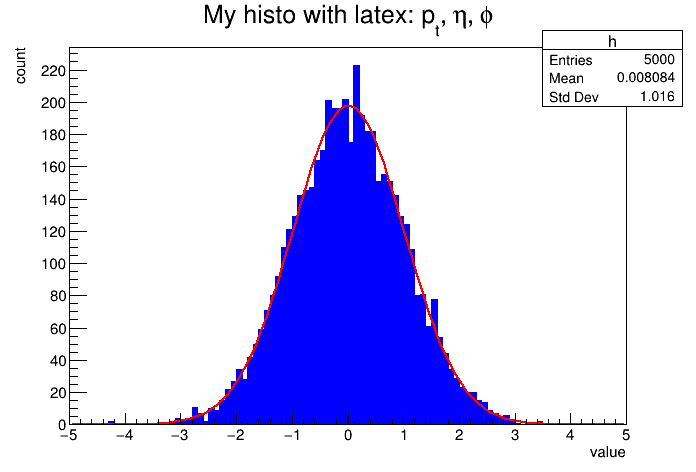

In [7]:
res = h.Fit("gaus", "S")
c3 = ROOT.TCanvas()
h.Draw()
c3.Draw()

ROOT graphs

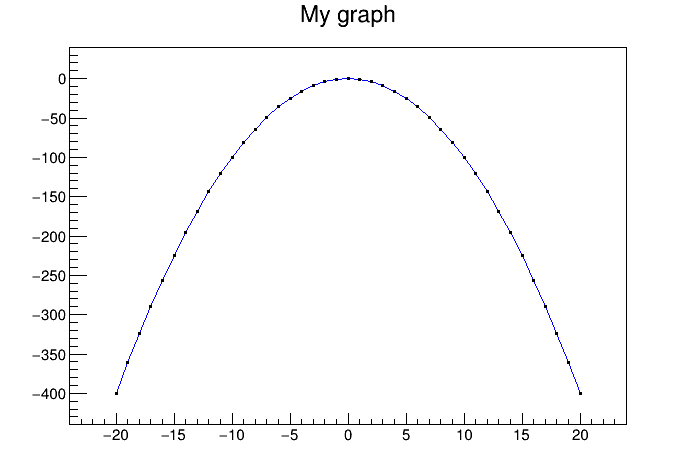

In [8]:
g = ROOT.TGraph()

for x in range(-20, 21):
    y = -x*x
    g.AddPoint(x, y)

c4 = ROOT.TCanvas()
g.SetMarkerStyle(7)
g.SetLineColor(ROOT.kBlue)
g.SetTitle("My graph")
g.Draw()
c4.Draw()

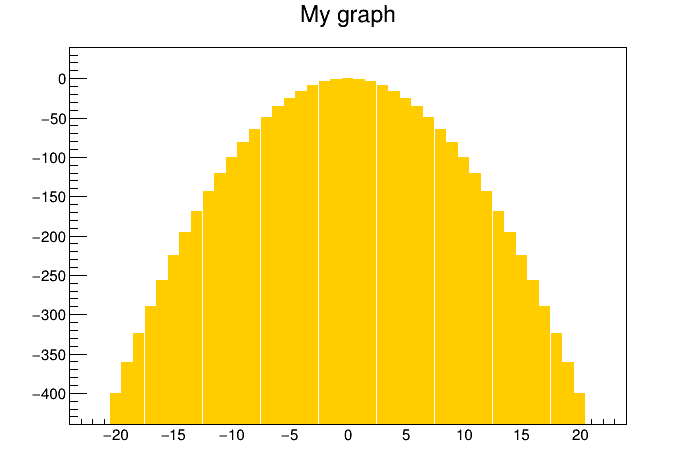

In [10]:
c5 = ROOT.TCanvas()
g.SetTitle("My graph")
g.SetFillColor(ROOT.kOrange)
g.Draw("AB1")
c5.Draw()

Plot example: histogram stack

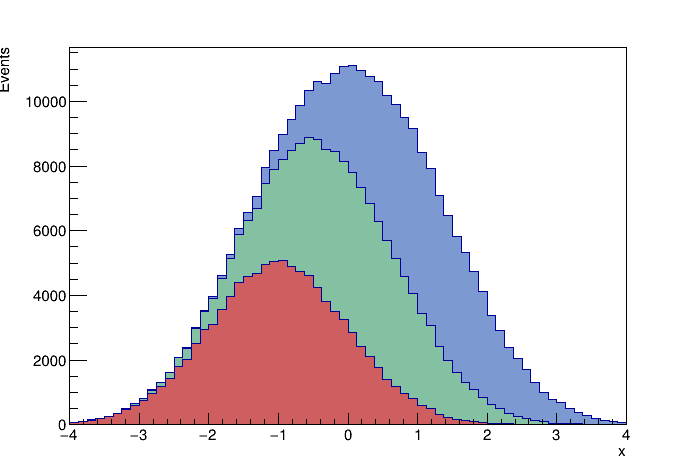

In [12]:
f1 = ROOT.TF1("f1", "gaus", -4.0, 4.0)

histos = [ROOT.TH1D(f"h{i}", "x", 64, -4.0, 4.0) for i in range(3)]

hs = ROOT.THStack("hs", "")
hs.SetTitle(";x;Events")

colors = [46, 30, 38]

for i in range(len(histos)):
    h = histos[i]
    f1.SetParameters(1.0, i - 1, 1.0)
    h.FillRandom("f1", 100000)
    h.SetFillColor(colors[i])
    hs.Add(h)

c6 = ROOT.TCanvas()
hs.Draw()
c6.Draw()

Plot example: efficiency curves

In [15]:
h_pass = ROOT.TH1D("h_pass", "My histogram", 50, 0, 100.0)
h_total = ROOT.TH1D("h_total", "My histogram", 50, 0, 100.0)

f_gaus = ROOT.TF1("f_gaus", "gaus", 0, 100.0)

f_gaus.SetParameters(1.0, 56.0, 20.0)
h_pass.FillRandom("f_gaus", 40000)
h_pass.SetLineColor(ROOT.kRed)
f_gaus.SetParameters(1.0, 50.0, 20.0)
h_total.FillRandom("f_gaus", 100000)


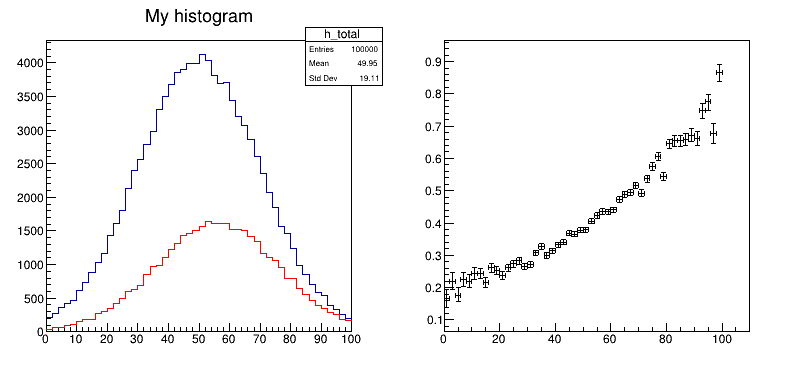

In [16]:
teff = ROOT.TEfficiency(h_pass, h_total)

c7 = ROOT.TCanvas("rf101_basics", "rf101_basics", 800, 400)
c7.Divide(2)
c7.cd(1)
h_total.Draw()
h_pass.Draw("SAME")
c7.cd(2)
teff.Draw()
c7.Draw()